In [1]:
'''

Description: This script reads in samples from an excel sheet, graphs the means of co and aerosol concentrations, and conducts a statistical analysis to determine whether or not there is a statistically signifiant differnce between the co/aerosol concentrations in cencus within parks vs outside of parks
In vs Out Parks
Author: Clio Bate, MSGIS  
Date Created: 05/03/2024  
Last date edited: 05/02/2024
Python Version:Python 3.11.8
Jupyter Notebook Version: 

'''

'\n\nDescription: This script reads in samples from an excel sheet, graphs the means of co and aerosol concentrations, and conducts a statistical analysis to determine whether or not there is a statistically signifiant differnce between the co/aerosol concentrations in cencus blocks of New York City where 75% or more of residents live below the 150% poverty line vs block where 25 or less of the residents live below the 150% poverty line. \nAuthor: Clio Bate, MSGIS  \nDate Created: 05/02/2024  \nLast date edited: 05/02/2024\nPython Version:Python 3.11.8\nJupyter Notebook Version: \n\n'

In [1]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.17.2
ipykernel        : 6.29.3
ipywidgets       : 8.1.2
jupyter_client   : 8.6.1
jupyter_core     : 5.7.2
jupyter_server   : 2.13.0
jupyterlab       : 4.1.5
nbclient         : 0.7.4
nbconvert        : 7.16.2
nbformat         : 5.10.3
notebook         : 7.1.2
qtconsole        : not installed
traitlets        : 5.14.2


In [61]:
# import packages
import matplotlib.pyplot as plt # 3.8.3
import pandas as pd #2.2.1
import sys
import scipy #1.12.0
from scipy import stats 
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import levene

In [4]:
#install openpyxl
!{sys.executable} -m pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [62]:
## read in data
excel = "parksdata4vis.xlsx"
aero_sheet = pd.read_excel(excel, sheet_name='aero_mean',index_col=None)
co_sheet = pd.read_excel(excel, sheet_name='co_mean', index_col=None)


print(co_sheet)

      Unnamed: 0   in_park               out_park
0    co_pre_mean  0.034544               0.034056
1    co_dur_mean  0.094202               0.090613
2  co_ post_mean  0.047633   0.047486588648198845


In [63]:
# bring in samples
# co pre
co_pre_inp = pd.read_excel(excel, sheet_name='co_pre_inP_Sample',index_col=None)
co_pre_outp= pd.read_excel(excel, sheet_name='co_pre_outP_Sample', index_col=None)

#co dur
co_dur_inp = pd.read_excel(excel, sheet_name='co_dur_inP_Sample', index_col=None)
co_dur_outp = pd.read_excel(excel, sheet_name='co_dur_outP_Sample',index_col=None)

# co post
co_post_inp = pd.read_excel(excel, sheet_name='co_post_inP_Sample', index_col=None)
co_post_outp = pd.read_excel(excel, sheet_name='co_post_outP_Sample', index_col=None)


#aerosol_pre
aerosol_pre_inp = pd.read_excel(excel, sheet_name='aero_pre_inP_Sample', index_col=None)
aerosol_pre_outp = pd.read_excel(excel, sheet_name='aero_pre_outP_Sample', index_col=None)


#aerosol_dur
aerosol_dur_inp = pd.read_excel(excel, sheet_name='aero_dur_inP_sample', index_col=None)
aerosol_dur_outp = pd.read_excel(excel, sheet_name='aero_dur_outP_sample', index_col=None)


#aerosol_post
aerosol_post_inp = pd.read_excel(excel, sheet_name='aero_post_inP_sample', index_col=None)
aerosol_post_outp = pd.read_excel(excel, sheet_name='aero_post_outP_sample', index_col=None)

## Graphs

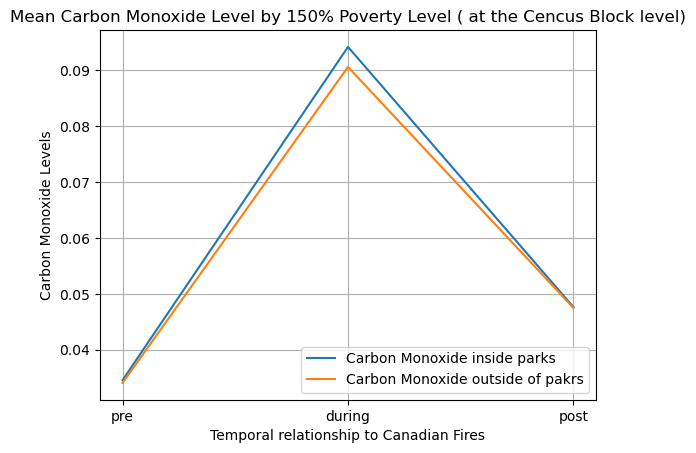

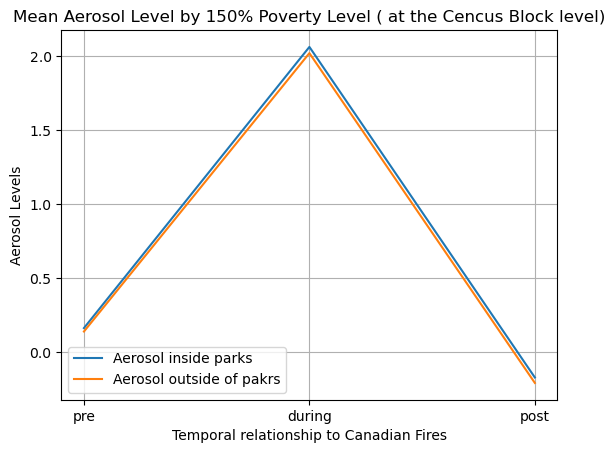

In [64]:
def graph(df, ColName1, ColName2, AorCO):
    '''

    This function takes four args
    1. name of the dataframe
    2. column name 1
    3. column anme 2
    4. whether or not its aerosol or co (string)

    and creates a line plot where the x-axis is pre, during, post values for co or aerosol in relation to the canadian wildfires in June 2023

    
    '''
    

    
    x_labels = ['pre', 'during', 'post']

    # Plot first line from first sheet
    plt.plot(x_labels, df[ColName1], label='{} inside parks'.format(AorCO))
    plt.plot(x_labels, df[ColName2], label='{} outside of pakrs'.format(AorCO))

    # Add labels and title
    plt.xlabel('Temporal relationship to Canadian Fires')
    plt.ylabel('{} Levels'.format(AorCO)) ## change here for CO/Aerosol
    plt.title('Mean {} Level by 150% Poverty Level ( at the Cencus Block level)'.format(AorCO)) # change here for 
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

graph(co_sheet, 'in_park', 'out_park', "Carbon Monoxide")
graph(aero_sheet, 'in_park', 'out_park', "Aerosol")

## Statistical Test


### Stat Function

In [46]:
def statAnalysis(df, colNamedf, df2, colNamedf2):
    '''
    
    This function takes four args
    1. df = first dataframe
    2. colNamedf = column name for first dataframe
    3. df2 = second dataframe
    4. colNamedf2 = column name for second df

    and 
    1. tests for normal distibution
    2. plots a histogram if one or both data is normally distributed
    3. if it is not normaly distibuted, perfroms a Levene variance test.
    4 will then perfom a t-test
    
    '''
    ## first df
    column_of_interest = df[colNamedf]
    column_of_interest2= df2[colNamedf2]
    # Perform Shapiro-Wilk test
    statistic, p_value = shapiro(column_of_interest)
    statistic2, p_value2 = shapiro(column_of_interest2)

    # Print the results
    print("\n")
    print("-------------------------------------------------------------------------------{} vs {}---start".format(colNamedf, colNamedf2))
    print("Shapiro-Wilk Test {}:".format(colNamedf))
    print("Test Statistic:", statistic)
    print("p-value:", p_value)
    print("----------------------------------------")

      # Print the results df2
    print("Shapiro-Wilk Test {}:".format(colNamedf2))
    print("Test Statistic:", statistic2)
    print("p-value:", p_value2)
    print("----------------------------------------")
    
    # Check the significance level
    alpha = 0.05
    if p_value > alpha and p_value2 > alpha: #just changed and to or
        print("The data looks normally distributed (fail to reject H0)")
        plt.hist(df[colNamedf], bins=10, color='blue', alpha=0.7)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title("Histogram of {}".format(colNamedf))
        plt.grid(True)
        plt.show()

        print("----------------------------------------")

        plt.hist(df2[colNamedf2], bins=10, color='blue', alpha=0.7)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title("Histogram of {}".format(colNamedf2))
        plt.grid(True)
        plt.show()
        print("----------------------------------------")
    else:
        print("The data does not look normally distributed... continue to levene test")
        print("----------------------------------------")

        #check for variance 
        # Example: Test the equality of variances between two groups
        stat, p_value_lev = levene(df[colNamedf], df2[colNamedf2])

        # Interpret the result 
        # if the variances are equal, the ttest will preformed where equal_var=True. if not equal_var=false
        if p_value_lev > 0.05:
            print("Results of Levene test: the variances are equal")
            stat, p_value_lev = stats.ttest_ind(df[colNamedf], df2[colNamedf2],equal_var=True)
            alphattest = 0.01
            if p_value > alphattest:
                print("T-Test {} vs {}:".format(colNamedf, colNamedf2))
                print("stat= {}, p_value={}".format(stat, p_value))
                print("P_value > alpha. Accept the Null Hypothosis. There is a not statistically significant difference between the means.".format(alphattest))
            else:
                print("T-Test {} vs {}:".format(colNamedf, colNamedf2))
                print("stat= {}, p_value={}".format(stat, p_value))
                print(" P_value < {}. Reject the Null Hypothesis. There is a statistically significant difference between the means.".format(alphattest))
            
        else:
            print("Results of Levene test: the variances are NOT equal")
            # prform t-test where equal_var=false
            stat, p_value = stats.ttest_ind(df[colNamedf], df2[colNamedf2],equal_var=False)
            alphattest = 0.01
            if p_value > alphattest:
                print("T-Test {} vs {}:".format(colNamedf, colNamedf2))
                print("stat= {}, p_value={}".format(stat, p_value))
                print("P_value > alpha. Accept the Null Hypothosis. There is a not statistically significant difference between the means.".format(alphattest))
                print("\n")
            else:
                print("T-Test {} vs {}:".format(colNamedf, colNamedf2))
                print("stat= {}, p_value={}".format(stat, p_value))
                print("P_value < {}. Reject the Null Hypothesis. There is a statistically significant difference between the means.".format(alphattest))
                print("\n")
        

In [65]:
# call function
print("\n","Carbon Monoxide")
# co
statAnalysis(co_pre_inp, 'co_pre_inP_Sample', co_pre_outp, 'co_pre_outP_Sample')
statAnalysis(co_dur_inp, 'co_dur_inP_Sample', co_dur_outp, 'co_dur_outP_Sample')
statAnalysis(co_post_inp, 'co_post_inP_Sample', co_post_outp, 'co_post_outP_Sample')

print("\n""Aerosol")
# aerosol
statAnalysis(aerosol_pre_inp, 'aero_pre_inP_Sample', aerosol_pre_outp,'aero_pre_outP_Sample')
statAnalysis(aerosol_dur_inp, 'aero_dur_inP_sample', aerosol_dur_outp,'aero_dur_outP_sample')
statAnalysis(aerosol_post_inp, 'aero_post_inP_sample', aerosol_post_outp,'aero_post_outP_sample')



 Carbon Monoxide


-------------------------------------------------------------------------------co_pre_inP_Sample vs co_pre_outP_Sample---start
Shapiro-Wilk Test co_pre_inP_Sample:
Test Statistic: 0.9707890480986087
p-value: 4.6169291736476916e-11
----------------------------------------
Shapiro-Wilk Test co_pre_outP_Sample:
Test Statistic: 0.9763191052747942
p-value: 1.2441797948860808e-09
----------------------------------------
The data does not look normally distributed... continue to levene test
----------------------------------------
Results of Levene test: the variances are equal
T-Test co_pre_inP_Sample vs co_pre_outP_Sample:
stat= 8.88240833317453, p_value=4.6169291736476916e-11
 P_value < 0.01. Reject the Null Hypothesis. There is a statistically significant difference between the means.


-------------------------------------------------------------------------------co_dur_inP_Sample vs co_dur_outP_Sample---start
Shapiro-Wilk Test co_dur_inP_Sample:
Test Statistic: 0.908